In [40]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [41]:
# Import the csv files
purity = pd.read_csv('P625_Log.csv', delimiter=',', decimal='.')
log_ultra = pd.read_csv('UltrasonicTest0.csv', delimiter=';', decimal=',')

In [42]:
# Keep only the ultrasonic purity
log_ultra = log_ultra[log_ultra['VarName'] == 'Calculated_He']

# Drop unneeded columns
log_ultra.drop(['VarName', 'Validity', 'Time_ms'], axis=1, inplace=True)

# Convert time strings to datetime objects
log_ultra['TimeString'] = pd.to_datetime(log_ultra['TimeString'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Trim the date range
log_ultra = log_ultra[(log_ultra['TimeString'] > '2023-03-13')]

log_ultra = log_ultra.rename(columns={'TimeString': 'time', 'VarValue': 'Purity'})

log_ultra['Purity'] = log_ultra['Purity'].str.replace(',', '.')
log_ultra['Purity'] = pd.to_numeric(log_ultra['Purity'])

log_ultra

,time,Purity
426476,2023-03-13 11:41:28,102.7352
426485,2023-03-13 11:41:33,102.7352
426494,2023-03-13 11:41:38,102.7352
426503,2023-03-13 11:41:43,102.7352
426512,2023-03-13 11:41:48,102.7343
...,...,...
437438,2023-03-13 13:24:02,102.6826
437447,2023-03-13 13:24:07,102.6900
437456,2023-03-13 13:24:12,102.6817
437465,2023-03-13 13:24:17,102.6752


In [43]:
# Time strings to datetime objects
purity['time'] = pd.to_datetime(purity['time'])

purity = purity[(purity['time'] > '2023-03-13 11:30:00.00')]

purity

,time,Purity
0,2023-03-13 14:21:07.200,99.182945
1,2023-03-13 14:18:14.400,99.184387
2,2023-03-13 14:15:21.600,99.185471
3,2023-03-13 14:12:28.800,99.186920
4,2023-03-13 14:09:36.000,99.188004
5,2023-03-13 14:06:43.200,99.189095
6,2023-03-13 14:03:50.400,99.189812
7,2023-03-13 14:00:57.600,99.190536
8,2023-03-13 13:58:04.800,99.191986
9,2023-03-13 13:55:12.000,99.192711


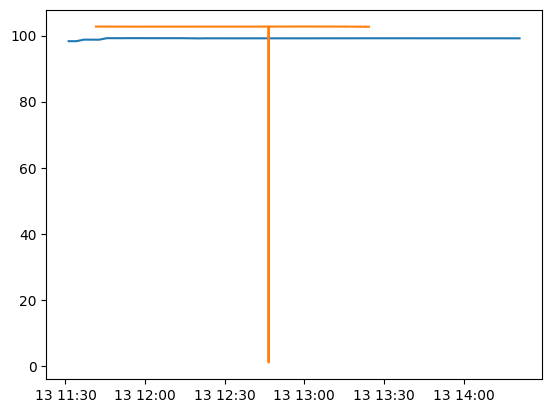

In [44]:
# Plot the values vs time

plt.plot(purity['time'], purity['Purity'])
plt.plot(log_ultra['time'], log_ultra['Purity'])
plt.show()